In [1]:
import numpy as np
from bcnf.debug.debug_plotting import debug_plotting
from bcnf.simulation.observation import simple_2D_camera_observation
from bcnf.simulation.physics import physics_ODE_simulation

In [8]:
x0 = [0, 0, 1.8]
w = np.array([0, 0, 0.0001])

[-15.125        0.          -9.80496623]
[-15.12492749   0.          -9.80496623]
[-15.12492749   0.          -9.80496623]
[-15.12485498   0.          -9.80496623]
[-15.12485498   0.          -9.80496623]
[-15.05612099   0.          -9.80496618]
[-15.05612049   0.          -9.80496618]
[-14.98782137   0.          -9.80496583]
[-14.98782038   0.          -9.80496583]
[-14.91995155   0.          -9.8049649 ]
[-14.91995057   0.          -9.8049649 ]
[-14.74711353   0.          -9.80495765]
[-14.74711097   0.          -9.80495765]
[-14.57702787   0.          -9.80493929]
[-14.57703087   0.          -9.80493929]
[-14.40964488   0.          -9.8049045 ]
[-14.40964519   0.          -9.8049045 ]
[-14.24489004   0.          -9.80484785]
[-14.24489034   0.          -9.80484785]
[-13.8591008    0.          -9.80458864]
[-13.85910306   0.          -9.80458864]
[-13.48735793   0.          -9.80409109]
[-13.48735638   0.          -9.80409109]
[-13.12888863   0.          -9.80327195]
[-13.12888675   

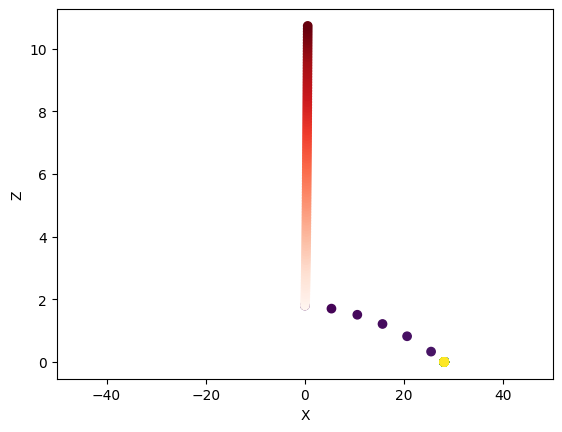

In [16]:
p1 = physics_ODE_simulation(x0=x0, w=w, v0=np.array([55, 0, 0]), m = 10)
p2 = physics_ODE_simulation(x0=x0, w=w, v0=np.array([55, 0, 0]), m = 0.001)

p1 = simple_2D_camera_observation(p1, noise=False, std=0.05)
p2 = simple_2D_camera_observation(p2, noise=False, std=0.05)

debug_plotting(p1, p2)

In [58]:
import numpy as np

def rotate_vector(vector, 
                  angle_degrees):  #angle [+45 and 45]
    # Convert angle from degrees to radians
    angle_radians = angle_degrees * np.pi / 180
    
    # tranfor vector to spherical coorinates
    r = np.linalg.norm(vector)
    theta = np.arccos(vector[2] / r)
    phi = np.arctan2(vector[1], vector[0])
    print(theta)
    # Update the spherical coordinates
    theta -= angle_radians

    # Transform the spherical coordinates back to Cartesian coordinates
    rotated_vector = np.array([r * np.sin(theta) * np.cos(phi),
                               r * np.sin(theta) * np.sin(phi), 
                               r * np.cos(theta)])
    
    return rotated_vector

# Example usage
vector = np.array([0.707, 0.707, 1])  # Example normalized 3D vector
angle_degrees = 90  # Example rotation angle
vector = vector / np.linalg.norm(vector)
rotated_vector = rotate_vector(vector, angle_degrees)
print("Original Vector:", vector)
print("Rotated Vector:", rotated_vector)
#vector = rotated_vector

0.7853226519949396
Original Vector: [0.49996224 0.49996224 0.70716017]
Rotated Vector: [-0.50003775 -0.50003775  0.70705338]


In [56]:
rotate_vector(rotated_vector, angle_degrees)

array([0.57735027, 0.57735027, 0.57735027])

In [11]:
from bcnf.simulation.physics import physics_ODE_simulation
from bcnf.simulation.camera import record_trajectory
import numpy as np

traj = physics_ODE_simulation(x0 = np.array([0, 0, 1.8]),      # initial position
                            v0 = np.array([0, 25, 25]),     # initial velocity
                            g = np.array([0, 0, -9.81]),     # gravitational acceleration
                            w = np.array([-5, 5, 5]),      # wind
                            b = 0.1,                              # drag coefficient
                            m = 0.25,                              # mass
                            rho = 1.225,                          # air density
                            r = 0.1,                              # radius of ball
                            a = np.array([0, 0, 0]),         # thrust
                            T = 4.0,                             # total run time in seconds
                            dt = 0.033)                             # time step

[ -2.88675135 -85.5015963  -95.11024535]
[ -2.88675135 -85.49924633 -95.10748779]
[ -2.88675135 -85.49924639 -95.10748787]
[ -2.88675135 -85.49689651 -95.10473044]
[ -2.88675135 -85.49689657 -95.10473052]
[ -2.88675135 -85.14402478 -94.69080221]
[ -2.88675135 -85.14402267 -94.69079905]
[ -2.88675135 -84.79328729 -94.27965914]
[ -2.88675135 -84.7932831  -94.27965288]
[ -2.88675135 -84.44466515 -93.87127303]
[ -2.88675135 -84.444661   -93.87126684]
[ -2.88675134 -83.22377122 -92.44327044]
[ -2.88675134 -83.22375082 -92.44324047]
[ -2.88675134 -83.43802956 -92.69362849]
[ -2.88675134 -83.43801553 -92.6936078 ]
[ -2.88675132 -82.44887675 -91.53866506]
[ -2.88675132 -82.4488932  -91.53869016]
[ -2.8867513  -81.4768968  -90.40592691]
[ -2.8867513  -81.47689857 -90.40593011]
[ -2.88675125 -80.52164323 -89.29475656]
[ -2.88675125 -80.52164496 -89.29475965]
[ -2.88675108 -78.6598576  -87.13498937]
[ -2.88675108 -78.65986543 -87.13500321]
[ -2.88675077 -76.86067124 -85.05523519]
[ -2.88675077 -7

MovieWriter imagemagick unavailable; using Pillow instead.


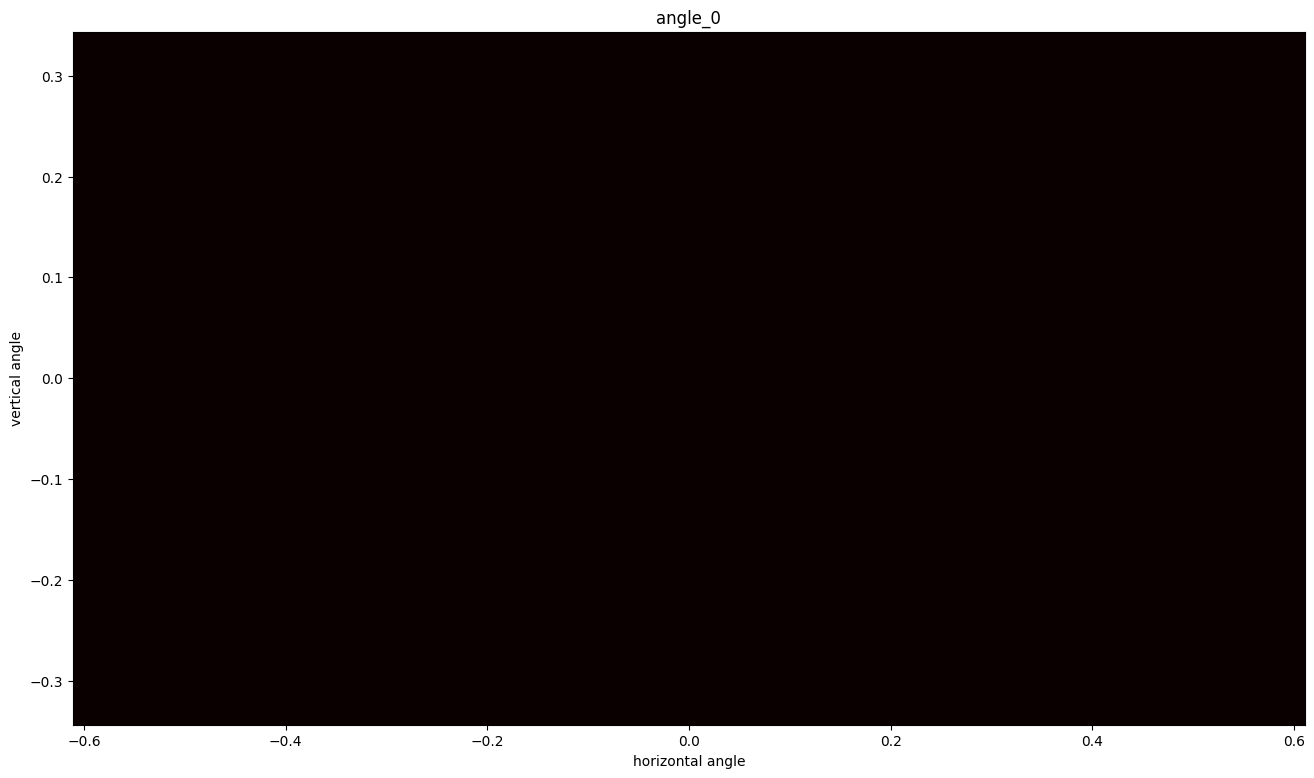

In [12]:
film = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), True, 'angle_0', viewing_angle=0.0)

MovieWriter imagemagick unavailable; using Pillow instead.


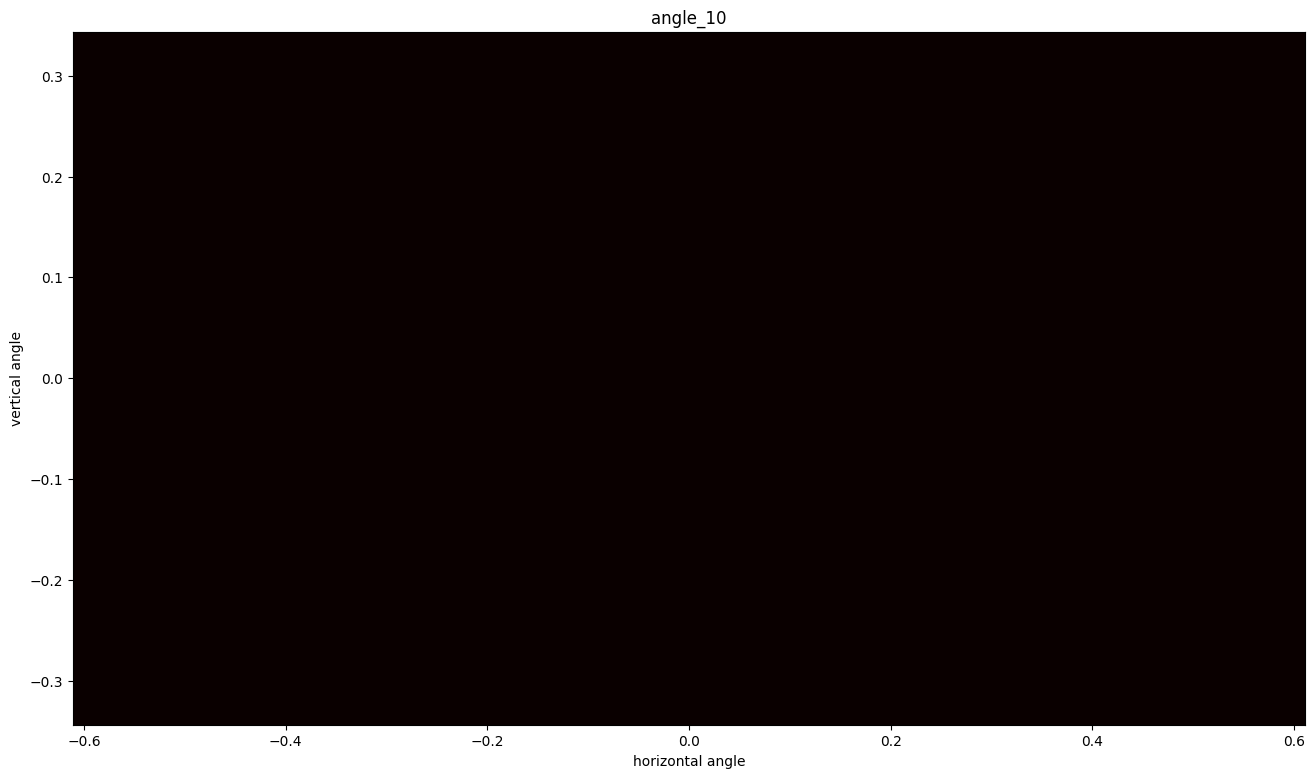

In [13]:
film = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), True, 'angle_10', viewing_angle=10.0)

MovieWriter imagemagick unavailable; using Pillow instead.


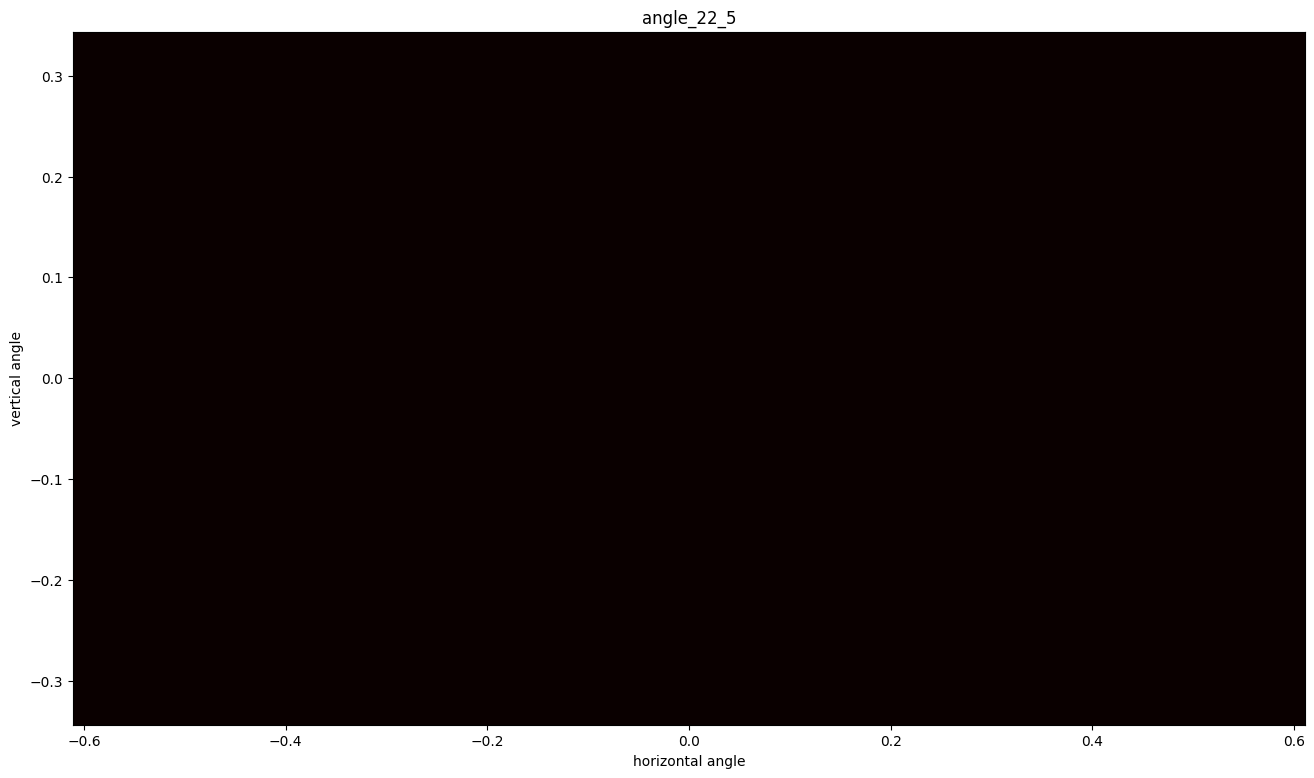

In [14]:
film = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), True, 'angle_22_5', viewing_angle=22.5)